# Build model

In this note book we build a model to predict if a leaf is healthy or not

In [1]:
import tensorflow as tf 
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# define dirs
base_dir = './cherry-leaves/'
train_dir = os.path.join(base_dir, 'training/')
test_dir = os.path.join(base_dir, 'validation/')


to increase the performance of our model we will perform data augmentation to increase the number of training samples when loading our data

In [3]:
#prepare training and validation data
train_data_gen = ImageDataGenerator(rescale=1./225,
                              width_shift_range=0.3,
                              height_shift_range=0.3,
                              rotation_range=60,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              fill_mode='nearest')

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=30,
    class_mode='binary'
)

test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=30,
    class_mode='binary'
)


Found 360 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [4]:
class RuntimeMinimizer(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= 0.998: 
            print("\nReached 99% validation accuracy. Stopping training!")
            self.model.stop_training = True

In [5]:
# make model deep neural net conv 

model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')

  ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [6]:
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=test_generator,
                    callbacks=[RuntimeMinimizer()])

Epoch 1/20
12/12 [==============================] - 16s 1s/step - loss: 3.9415 - accuracy: 0.5194 - val_loss: 0.6791 - val_accuracy: 0.5000
Epoch 2/20
12/12 [==============================] - 14s 1s/step - loss: 0.6769 - accuracy: 0.5694 - val_loss: 0.6245 - val_accuracy: 0.8000
Epoch 3/20
12/12 [==============================] - 16s 1s/step - loss: 0.6161 - accuracy: 0.7167 - val_loss: 0.4694 - val_accuracy: 0.9500
Epoch 4/20
12/12 [==============================] - 16s 1s/step - loss: 0.4385 - accuracy: 0.8472 - val_loss: 0.2449 - val_accuracy: 0.9500
Epoch 5/20
12/12 [==============================] - 16s 1s/step - loss: 0.3276 - accuracy: 0.8500 - val_loss: 0.2791 - val_accuracy: 0.8250
Epoch 6/20
12/12 [==============================] - ETA: 0s - loss: 0.2092 - accuracy: 0.9250
Reached 99% validation accuracy. Stopping training!
12/12 [==============================] - 15s 1s/step - loss: 0.2092 - accuracy: 0.9250 - val_loss: 0.0720 - val_accuracy: 1.0000


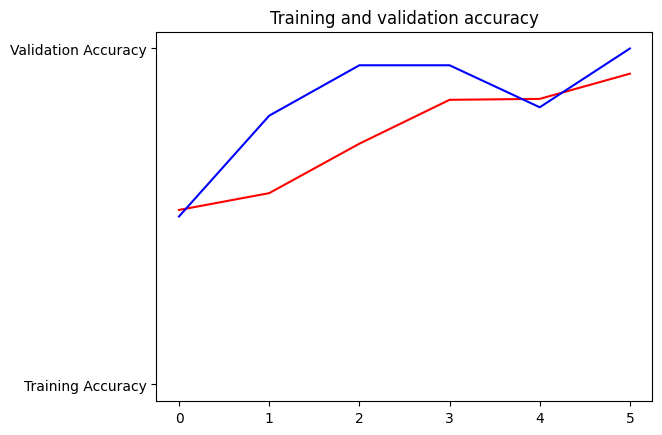

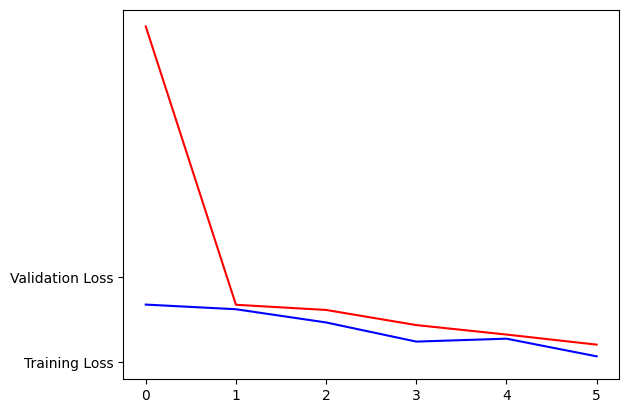

In [7]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

Resuls show 99 % accuracy on validation set and 97% on training set model can be said to meet business requirements

In [8]:
import pickle
with open('models/history.pickle', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [9]:
with open('models/history.pickle', 'rb') as file_pi:
    loaded_history = pickle.load(file_pi)

In [10]:
loaded_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
loaded_history['loss']

[3.941481590270996,
 0.676905632019043,
 0.616139829158783,
 0.4385461211204529,
 0.32759425044059753,
 0.2092362344264984]

In [12]:
model = tf.keras.models.load_model('models/cherry-picker-v1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('models/model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\sgtec\AppData\Local\Temp\tmp8sl7tmte\assets


INFO:tensorflow:Assets written to: C:\Users\sgtec\AppData\Local\Temp\tmp8sl7tmte\assets
